In [4]:
import os
os.chdir('../')
from data.load_dataset_atonce import  SpectralDataset
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import torch
import torch.nn.functional as F

from net.chemtools.PLS import PLS,k_fold_cross_validation
from net.chemtools.metrics import ccc, r2_score

import pickle


In [5]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['font.family'] = 'Times New Roman'

In [7]:
data_path = "C:\\00_aioly\\GitHub\\datasets\\ossl\\ossl_all_L1_v1.2.csv"


y_labels = ["oc_usda.c729_w.pct", "na.ext_usda.a726_cmolc.kg", "clay.tot_usda.a334_w.pct", 
                "k.ext_usda.a725_cmolc.kg", "ph.h2o_usda.a268_index"]  
dataset_type = "mir"
    
    
dataset = SpectralDataset(data_path, y_labels, dataset_type)
spec_dims = dataset.spec_dims

X_train=dataset.X_train
X_test=dataset.X_val
Y_train=dataset.Y_train
Y_test=dataset.Y_val

base_path = os.path.join(os.path.dirname(data_path), 'figures', 'pls', 'data_mir')
if not os.path.exists(base_path):
        os.makedirs(base_path)

c:\00_aioly\GitHub\Aioly\net\chemtools\PLS.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64).clone().detach()
c:\00_aioly\GitHub\Aioly\net\chemtools\PLS.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64).clone().detach()
c:\00_aioly\GitHub\Aioly\net\chemtools\PLS.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64).clone().detach()
c:\00_aioly\GitHub\Aioly\net\chemtools\PLS.py:96: UserWarning: To copy construct f

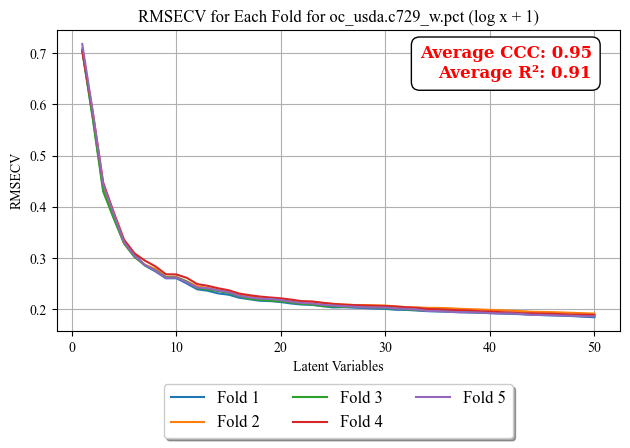

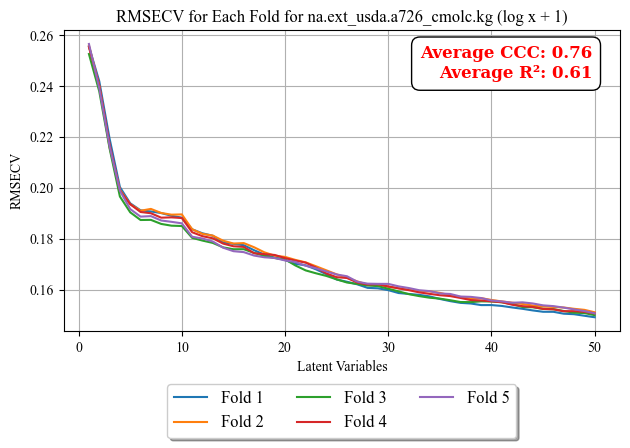

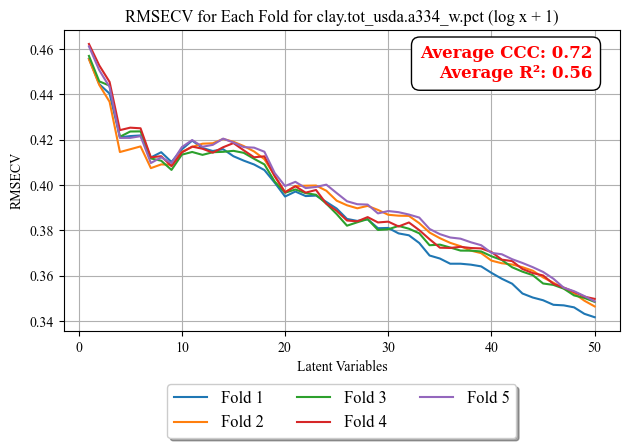

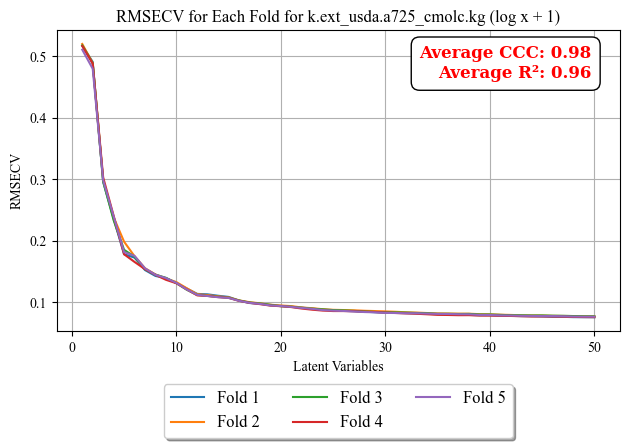

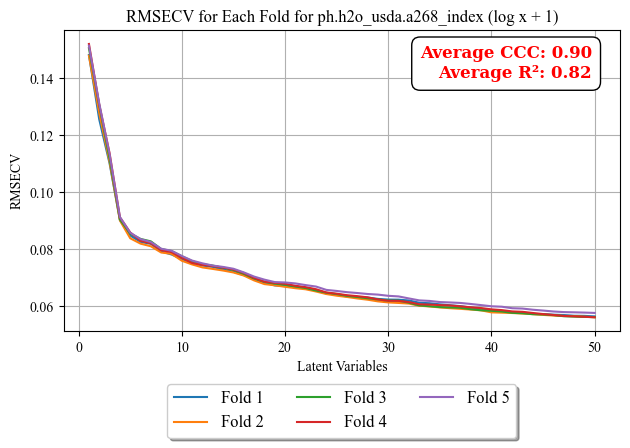

In [8]:
k_folds = 5  # Number of folds for cross-validation
ncomp = 50  # Number of components for PLS
    
for target_label in y_labels:
    target_index = y_labels.index(target_label)
    Y_train_subset = Y_train[:, target_index].unsqueeze(1)
    Y_test_subset = Y_test[:, target_index].unsqueeze(1)

    Y_train_subset = torch.log1p(Y_train_subset)
    Y_test_subset = torch.log1p(Y_test_subset)
    
    fold_rmsecv, fold_ccc, fold_r2 = k_fold_cross_validation(X_train, Y_train_subset, ncomp, k_folds)
        
    # Plot RMSECV for all folds
    fig = plt.figure()
    for fold in range(len(fold_rmsecv)):
        plt.plot(range(1, ncomp + 1), fold_rmsecv[fold], label=f'Fold {fold + 1}', linestyle='-')

    plt.xlabel('Latent Variables')
    plt.ylabel('RMSECV')
    plt.title(f' {k_folds}_fold RMSECV Y={target_label} (log x + 1)')
    plt.tight_layout()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3, fontsize=12)
    plt.subplots_adjust(bottom=0.3)
    plt.grid(True)
    plt.text(0.95, 0.95, f'Average CCC: {np.mean(fold_ccc):.2f}\nAverage R²: {np.mean(fold_r2):.2f}', 
            transform=plt.gca().transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
            color='red', fontweight='bold', fontfamily='serif')
    plt.show()

    pdf_path = os.path.join(base_path, f'RMSECV_5fold_{dataset_type}_{target_label}.pdf')
    plt.savefig(pdf_path, format='pdf')

    pickle_path = os.path.join(base_path, f'RMSECV_5fold_{dataset_type}_{target_label}.pkl')
    with open(pickle_path, 'wb') as f:
        pickle.dump(fig, f)
